In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path="https://raw.githubusercontent.com/DeboraMandon/video_game_sales_analysis/main/vgsales.csv"
df=pd.read_csv(path, index_col=0)
df.head()



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# TYPE DE VARIABLE

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


In [4]:
var_cat=['Name', 'Platform','Genre', 'Publisher']
var_num=['Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

In [5]:
# TAUX DE NA

print(df.isna().sum())
#pourcentage de valeur nulle pour la variable Year
Year_Na=(df['Year'].isna().sum())/(len(df['Year']))
Year_Na=Year_Na*100
print('Year',round(Year_Na,2),'%')

#pourcentage de valeur nulle pour la variable Publisher
Year_Na=(df['Publisher'].isna().sum())/(len(df['Publisher']))
Year_Na=Year_Na*100
print('Publisher',round(Year_Na,2),'%')

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Year 1.63 %
Publisher 0.35 %


In [6]:
# DISTRIBUTION DES VALEURS

print(df.describe())
print(df.describe(include='O'))

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  
                               Name Platform   Genre        Publisher
count               

In [7]:
# ETENDUE DES VALEURS

print(df['Platform'].unique())
print(df['Year'].unique())
print(df['Genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Peformance des ventes moyennes par région


In [8]:
# Calcul de la moyenne des ventes par région
NA_mean=(df['NA_Sales'].mean()*1000000)
EU_mean=(df['EU_Sales'].mean()*1000000)
JP_mean=(df['JP_Sales'].mean()*1000000)
Other_mean=(df['Other_Sales'].mean()*1000000)
Global_mean=(df['Global_Sales'].mean()*1000000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


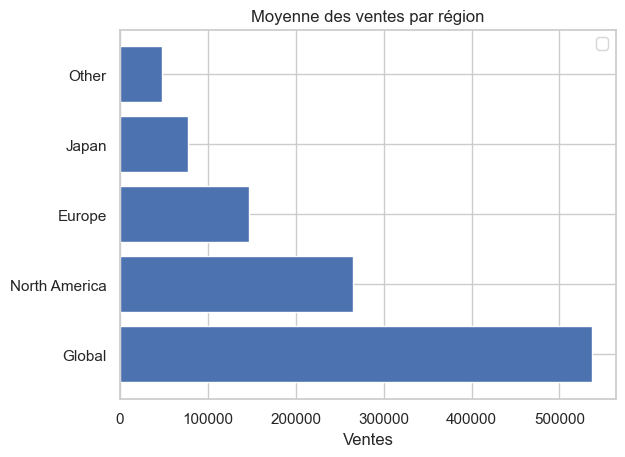

In [241]:
y=['Global','North America', 'Europe', 'Japan','Other']
x=[537440.656,264667.430, 146652.006, 77781.660, 48063.020]

fig, ax = plt.subplots()
ax.barh(y, x, align='center')
ax.set_xlabel('Ventes')
ax.set_title('Moyenne des ventes par région')

plt.legend()
plt.show();


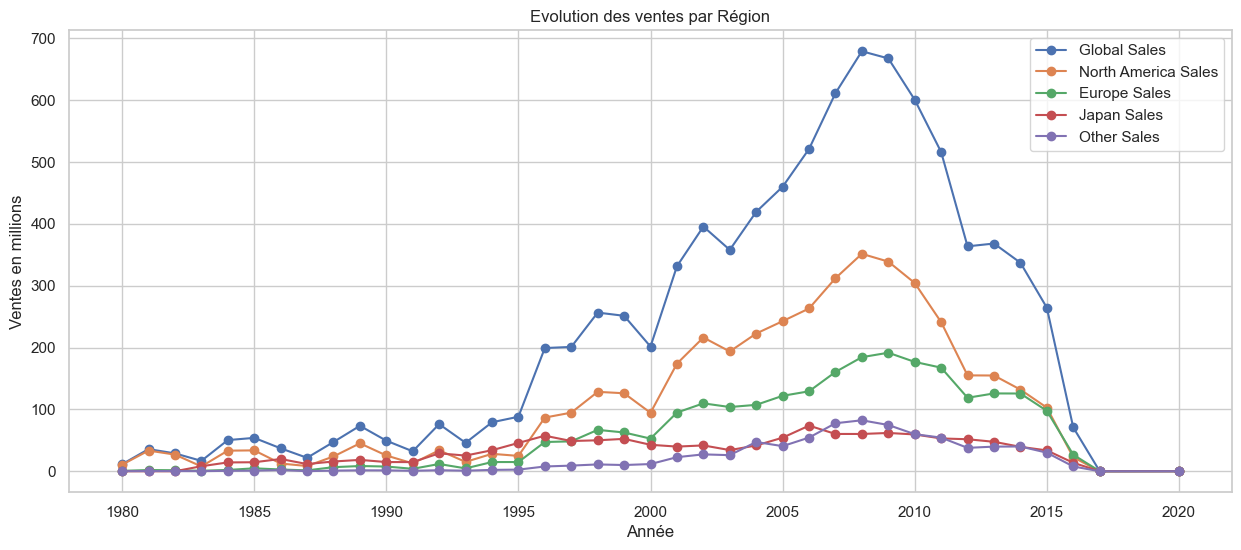

In [26]:
for i in var_num:
    df['cat_'+i]=pd.qcut(df[i], q=[0,.25,.5,.75,1.], duplicates='drop')

df['Year']=pd.to_datetime(df['Year'], format='%Y')

sales_per_year=df.groupby('Year', as_index=False).agg({'NA_Sales':sum, 'EU_Sales':sum, 'JP_Sales':sum, 'Other_Sales':sum,'Global_Sales':sum})

sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Global_Sales'].values,
              xdate=True,
              ls='-',
              label='Global Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['NA_Sales'].values,
              xdate=True,
              ls='-',
              label='North America Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['EU_Sales'].values,
              xdate=True,
              ls='-',
              label='Europe Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['JP_Sales'].values,
              xdate=True,
              ls='-',
              label='Japan Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Other_Sales'].values,
              xdate=True,
              ls='-',
              label='Other Sales')
plt.legend(loc='best')
plt.xlabel('Année')
plt.ylabel('Ventes en millions')
plt.title('Evolution des ventes par Région')
plt.show();

Plateformes préférées selon la Region


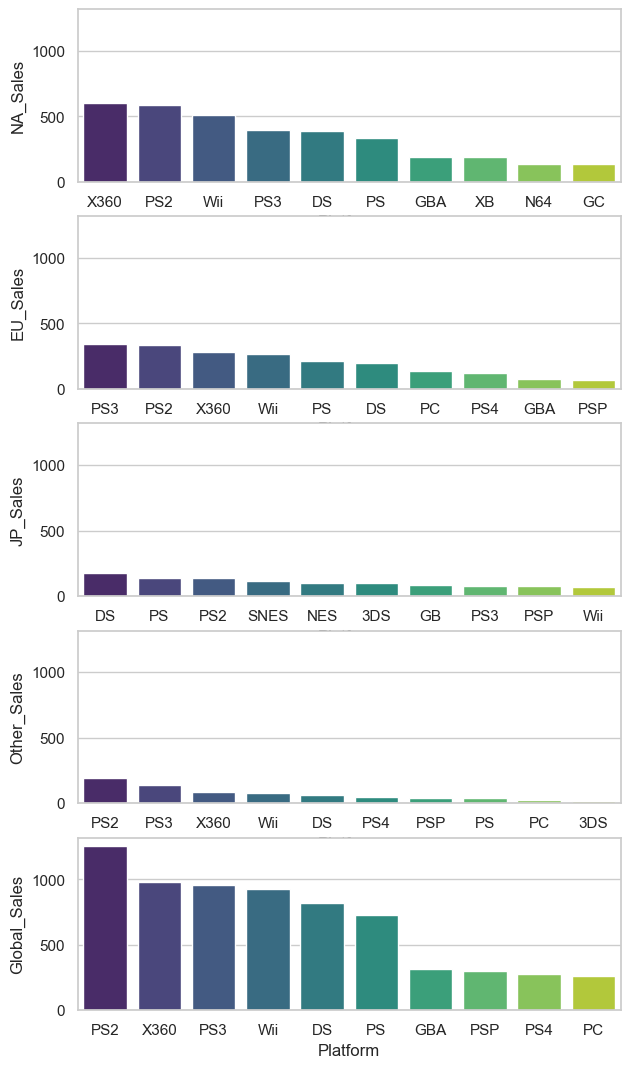

In [91]:
NA_Platform=df.groupby("Platform")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index().head(10)
EU_Platform=df.groupby("Platform")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index().head(10)
JP_Platform=df.groupby("Platform")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index().head(10)
Other_Platform=df.groupby("Platform")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index().head(10)
Global_Platform=df.groupby("Platform")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index().head(10)

fig, ax = plt.subplots(5,figsize=(7, 13), sharey=True)

sns.barplot(x='Platform', y='NA_Sales',
            palette="viridis",
            data=NA_Platform,
            ax=ax[0])

sns.barplot(x='Platform', y='EU_Sales',
            palette="viridis",             
            data=EU_Platform,
            ax=ax[1])

sns.barplot(x='Platform', y='JP_Sales',
            palette="viridis", 
            data=JP_Platform,
            ax=ax[2])

sns.barplot(x='Platform', y='Other_Sales',
            palette="viridis",
            data=Other_Platform,
            ax=ax[3])

sns.barplot(x='Platform', y='Global_Sales',
            palette="viridis",
            data=Global_Platform,
            ax=ax[4]);

Impact de l'Editeur sur les ventes


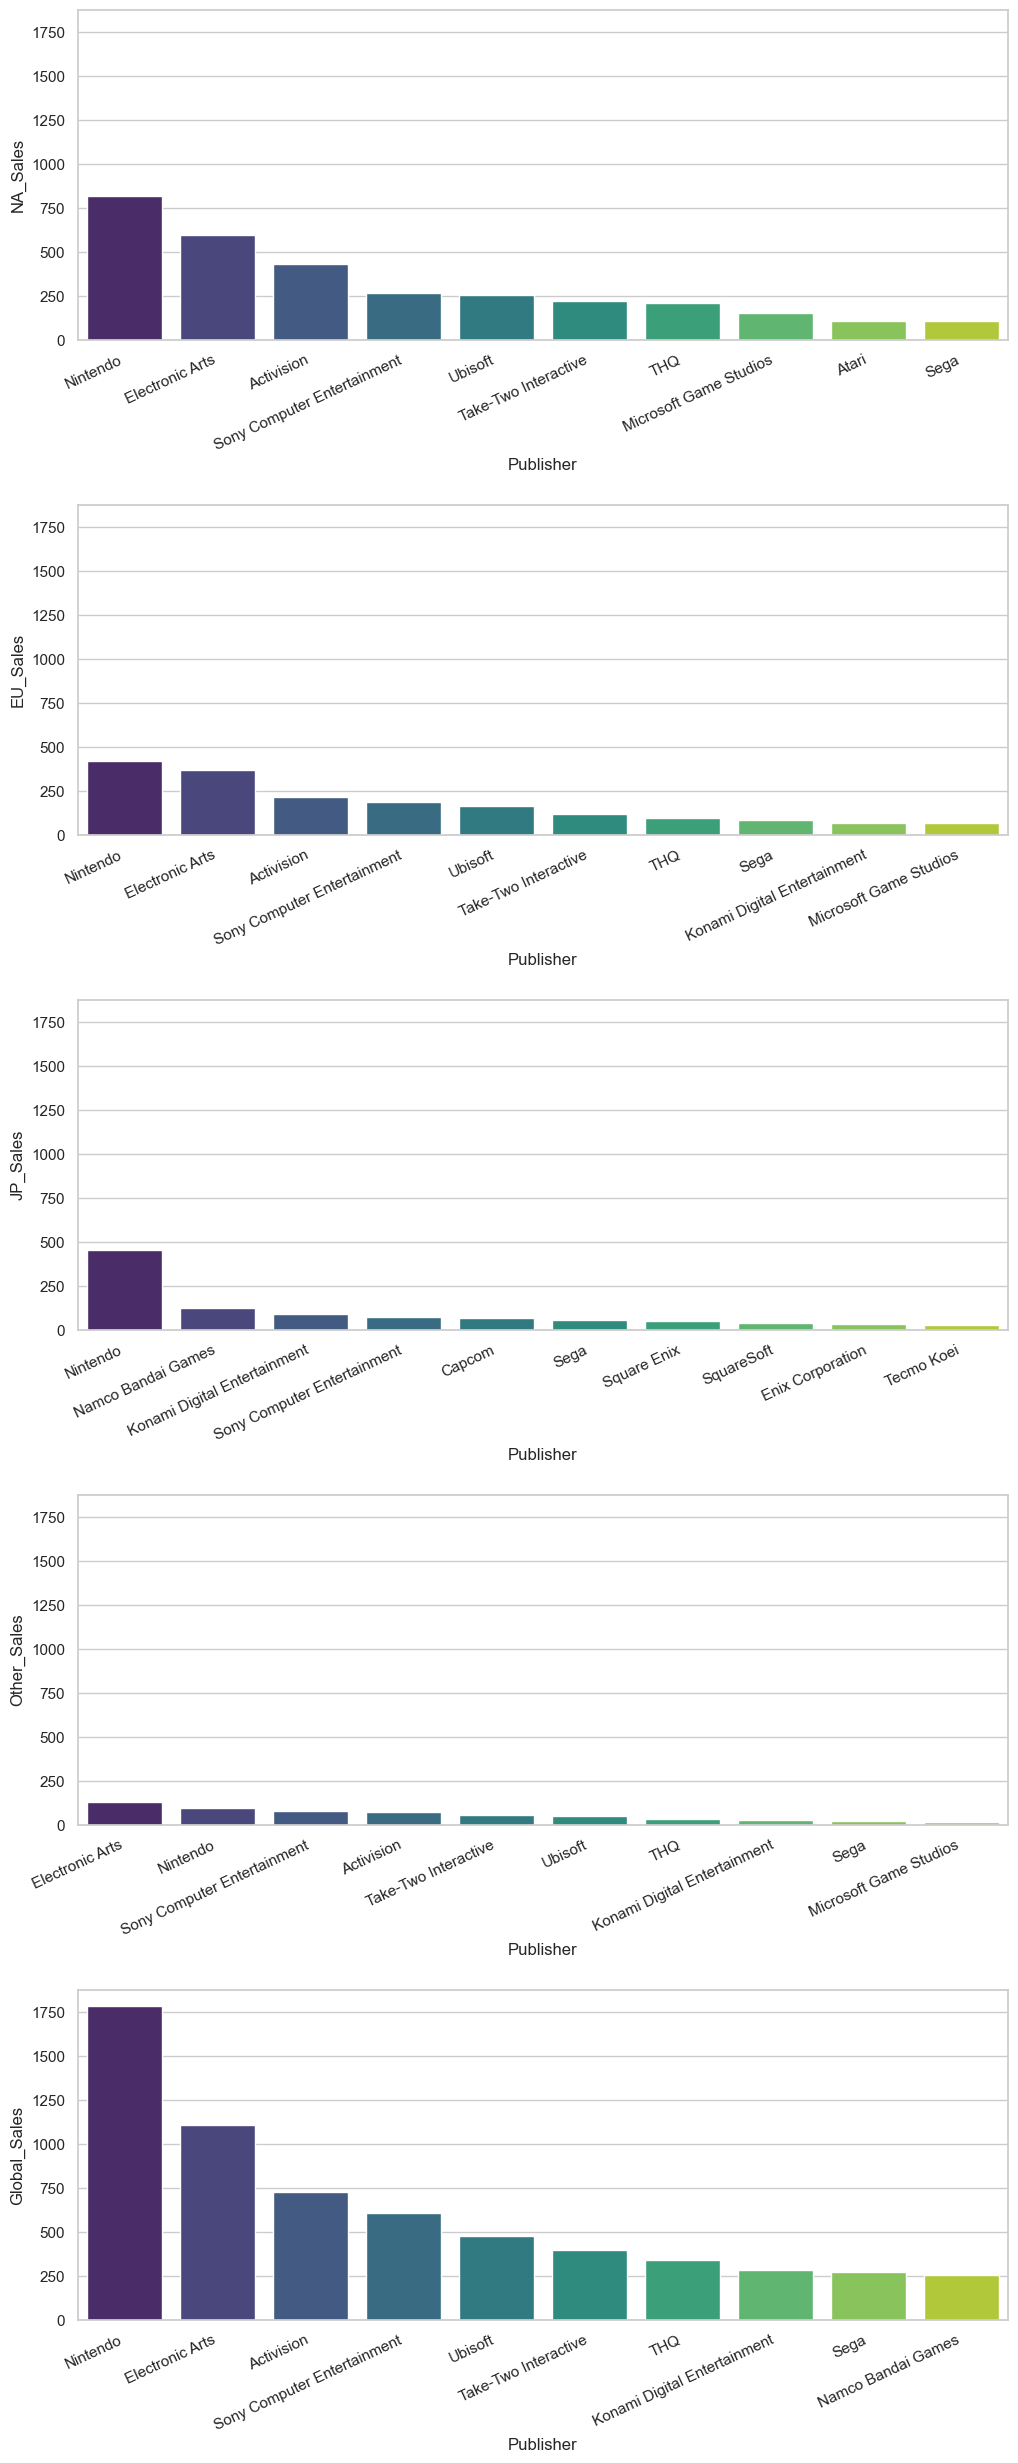

In [143]:
NA_Publisher=df.groupby("Publisher")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index().head(10)
EU_Publisher=df.groupby("Publisher")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index().head(10)
JP_Publisher=df.groupby("Publisher")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index().head(10)
Other_Publisher=df.groupby("Publisher")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index().head(10)
Global_Publisher=df.groupby("Publisher")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index().head(10)


fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(12, 30), sharey=True)
fig.subplots_adjust(hspace=0.5)

sns.barplot(x='Publisher', y='NA_Sales',
            palette="viridis",
            data=NA_Publisher,
            ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Publisher', y='EU_Sales',
            palette="viridis",             
            data=EU_Publisher,
            ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Publisher', y='JP_Sales',
            palette="viridis", 
            data=JP_Publisher,
            ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Publisher', y='Other_Sales',
            palette="viridis",
            data=Other_Publisher,
            ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Publisher', y='Global_Sales',
            palette="viridis",
            data=Global_Publisher,
            ax=ax5);
ax5.set_xticklabels(ax5.get_xticklabels(),
                    rotation=25, ha='right');



Genres de jeux vidéos préférés selon la Region


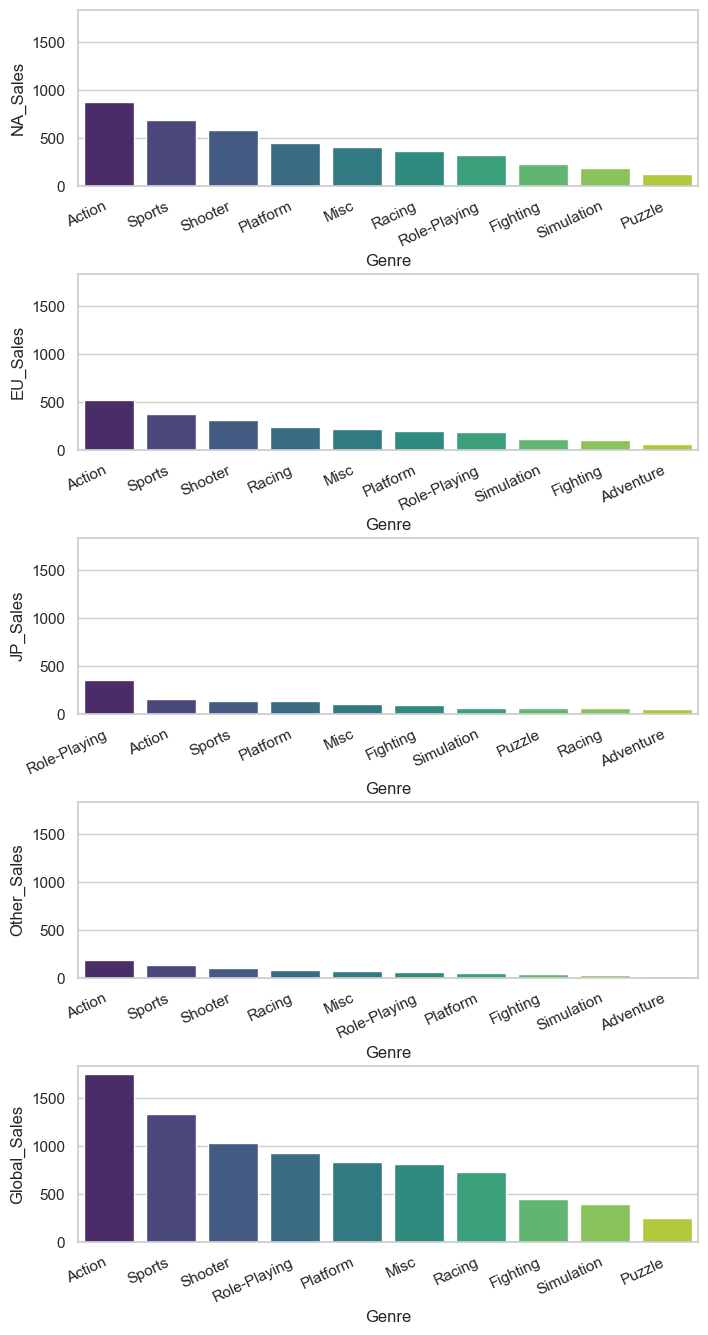

In [156]:
NA_Genre=df.groupby("Genre")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index().head(10)
EU_Genre=df.groupby("Genre")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index().head(10)
JP_Genre=df.groupby("Genre")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index().head(10)
Other_Genre=df.groupby("Genre")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index().head(10)
Global_Genre=df.groupby("Genre")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index().head(10)


fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(8, 16), sharey=True)
fig.subplots_adjust(hspace=0.5)

sns.barplot(x='Genre', y='NA_Sales',
            palette="viridis",
            data=NA_Genre,
            ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Genre', y='EU_Sales',
            palette="viridis",             
            data=EU_Genre,
            ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Genre', y='JP_Sales',
            palette="viridis", 
            data=JP_Genre,
            ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Genre', y='Other_Sales',
            palette="viridis",
            data=Other_Genre,
            ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Genre', y='Global_Sales',
            palette="viridis",
            data=Global_Genre,
            ax=ax5);
ax5.set_xticklabels(ax5.get_xticklabels(),
                    rotation=25, ha='right');



Jeux les plus vendus

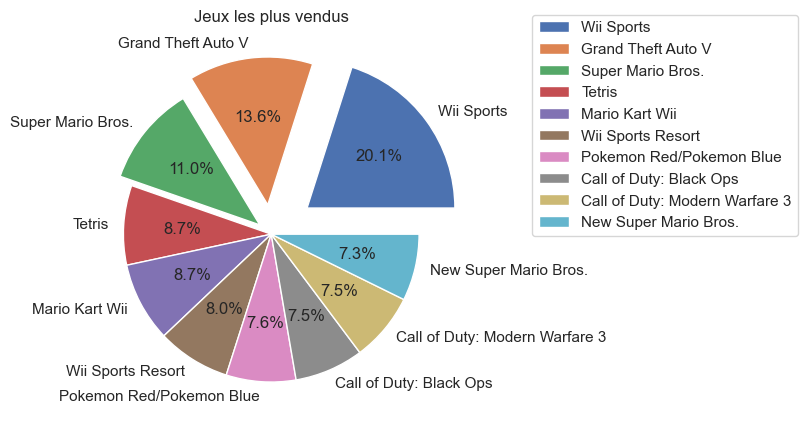

In [240]:

top_games = pd.DataFrame(df.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
top_games.head(10)

#name_games=top_games['Name'].tolist()
#sales_games=top_games['Global_Sales'].tolist()

ax=top_games.head(10).plot.pie(title='Jeux les plus vendus',
                   y='Global_Sales',
                   labels=top_games['Name'].head(10),
                   explode=(0.3,0.2,0.1,0,0,0,0,0,0,0),
                   autopct='%1.1f%%');
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.3), borderaxespad=5.)
ax.set_ylabel('')
plt.title('Jeux les plus vendus',pad=20)
plt.show();


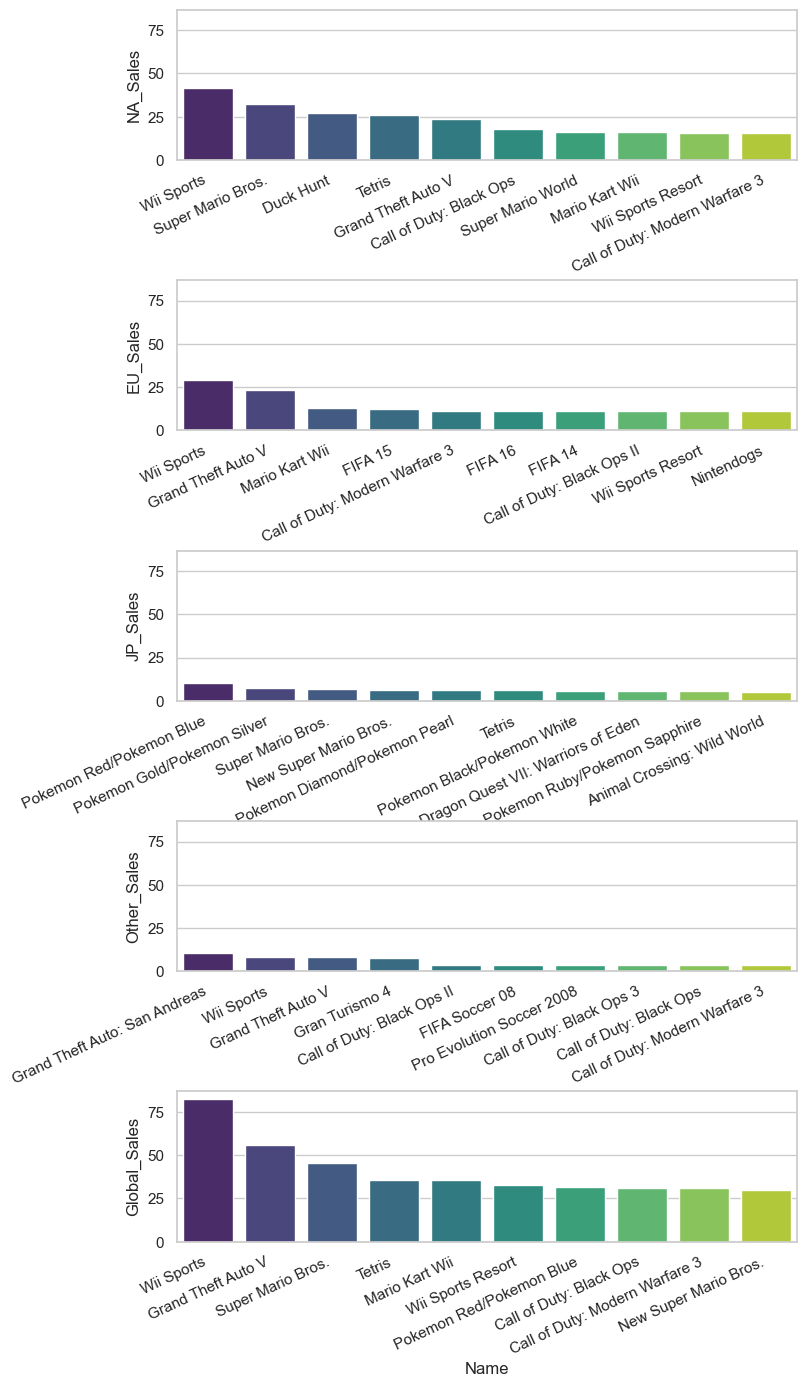

In [243]:
NA_Name=df.groupby("Name")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index().head(10)
EU_Name=df.groupby("Name")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index().head(10)
JP_Name=df.groupby("Name")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index().head(10)
Other_Name=df.groupby("Name")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index().head(10)
Global_Name=df.groupby("Name")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index().head(10)


fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=(8, 16), sharey=True)
fig.subplots_adjust(hspace=0.8)

sns.barplot(x='Name', y='NA_Sales',
            palette="viridis",
            data=NA_Name,
            ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Name', y='EU_Sales',
            palette="viridis",             
            data=EU_Name,
            ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Name', y='JP_Sales',
            palette="viridis", 
            data=JP_Name,
            ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Name', y='Other_Sales',
            palette="viridis",
            data=Other_Name,
            ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),
                    rotation=25, ha='right')

sns.barplot(x='Name', y='Global_Sales',
            palette="viridis",
            data=Global_Name,
            ax=ax5);
ax5.set_xticklabels(ax5.get_xticklabels(),
                    rotation=25, ha='right');